(CONFIDENTIAL) INTERNAL USE ONLY, NOT FOR EXTERNAL DISTRIBUTION

<h1 id="tocheading">Table of Contents</h1>
<div id="toc"></div>

In [1]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>

In [3]:
# jupyter lab
# jupyter hub / google colab

In [4]:
import numpy as np
import sklearn as sk
import pandas as pd
import matplotlib.pyplot as plt

# import tensorflow as tf
%matplotlib inline

# Dataset

## load

In [5]:
from sklearn import datasets

In [10]:
%%time
print("Load iris")
data = datasets.load_iris()

Load iris
CPU times: user 2.23 ms, sys: 1.39 ms, total: 3.62 ms
Wall time: 2.47 ms


In [11]:
print(data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [12]:
X = data.data
print(X.shape)

(150, 4)


In [14]:
X[:4]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2]])

In [15]:
Y = data.target
print(Y.shape)

(150,)


In [16]:
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [17]:
import collections

In [18]:
collections.Counter(Y)

Counter({0: 50, 1: 50, 2: 50})

## Fetch

In [22]:
data = datasets.fetch_20newsgroups()

In [24]:
# print(data.DESCR)

In [25]:
X = data.data
print(len(X))

11314


In [26]:
print(X[0])

From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----







In [27]:
Y = data.target
print(len(Y))

11314


In [28]:
Y

array([7, 4, 4, ..., 3, 1, 8])

In [31]:
counts = collections.Counter(Y)
counts = sorted(counts.items(), key=lambda x: x[0])
counts

[(0, 480),
 (1, 584),
 (2, 591),
 (3, 590),
 (4, 578),
 (5, 593),
 (6, 585),
 (7, 594),
 (8, 598),
 (9, 597),
 (10, 600),
 (11, 595),
 (12, 591),
 (13, 594),
 (14, 593),
 (15, 599),
 (16, 546),
 (17, 564),
 (18, 465),
 (19, 377)]

## Make

In [55]:
# datasets.make_blobs
X, Y = datasets.make_blobs(
    n_samples=1000,
    n_features=4,
    centers=10,
    cluster_std=0.3
)

In [56]:
print(X.shape)

(1000, 4)


In [57]:
print(Y.shape)

(1000,)


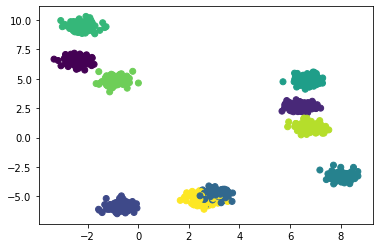

In [58]:
plt.scatter(X[:, 0], X[:, 1], c=Y)
plt.show()

In [4]:
# Excercise: create visualize the above given data, see how the cluster is spread out.

# Feature extraction

In [59]:
from sklearn import feature_extraction

## DictVectorizer

In [61]:
data = [
    {'today': 1, 'is': 1, 'good': 1, 'day': 1},
    {'tomorrow': 1, 'is': 1, 'good': 1, 'day': 1},
    {'yesterday': 1, 'is': 1, 'good': 1, 'day': 1}
]

In [67]:
dict_vectorizer = feature_extraction.DictVectorizer()

In [68]:
dict_vectorizer.feature_names_

AttributeError: 'DictVectorizer' object has no attribute 'feature_names_'

In [69]:
# fit_transform = fit + transform

# option 1:
# Xnew = pipeline.fit_transform(X)

# option2:
# pipeline.fit(X)
# Xnew = pipeline.transform(X)

# For test/validation dataset, only transform
# Xtrain_new = pipeline.fit_tranform(Xtrain)
# Xtest_new = pipeline.tranform(Xtest)

# same for fit_predict

%time dict_vectorizer.fit(data)

CPU times: user 31 µs, sys: 1e+03 ns, total: 32 µs
Wall time: 40.1 µs


DictVectorizer(dtype=<class 'numpy.float64'>, separator='=', sort=True,
               sparse=True)

In [70]:
dict_vectorizer.feature_names_

['day', 'good', 'is', 'today', 'tomorrow', 'yesterday']

In [71]:
dict_vectorizer.vocabulary_

{'day': 0, 'good': 1, 'is': 2, 'today': 3, 'tomorrow': 4, 'yesterday': 5}

In [72]:
vectorized_data = dict_vectorizer.transform(data)

In [74]:
vectorized_data = vectorized_data.todense()

In [75]:
vectorized_data

matrix([[1., 1., 1., 1., 0., 0.],
        [1., 1., 1., 0., 1., 0.],
        [1., 1., 1., 0., 0., 1.]])

In [77]:
df = pd.DataFrame(vectorized_data, columns=dict_vectorizer.get_feature_names())
df

,day,good,is,today,tomorrow,yesterday
0,1.0,1.0,1.0,1.0,0.0,0.0
1,1.0,1.0,1.0,0.0,1.0,0.0
2,1.0,1.0,1.0,0.0,0.0,1.0


In [91]:
t1 = 'data scientist needs to learn statistics statistics'
t2 = 'data scientist scientist needs to learn computer science'
t3 = 'data scientist needs to learn business'
t4 = 'data scientist needs to know chemistry'

text_data = [t1, t2, t3, t4]

## CountVectorizer

In [92]:
count_vectorizer = feature_extraction.text.CountVectorizer()

In [93]:
count_vectorizer

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [94]:
%%time
count_vectorizer.fit(text_data)

CPU times: user 1.31 ms, sys: 26 µs, total: 1.33 ms
Wall time: 1.46 ms


CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [95]:
count_vectorizer.get_feature_names()

['business',
 'chemistry',
 'computer',
 'data',
 'know',
 'learn',
 'needs',
 'science',
 'scientist',
 'statistics',
 'to']

In [96]:
vectorized_text_data = count_vectorizer.transform(text_data)
vectorized_text_data = vectorized_text_data.todense()

In [97]:
vectorized_text_data

matrix([[0, 0, 0, 1, 0, 1, 1, 0, 1, 2, 1],
        [0, 0, 1, 1, 0, 1, 1, 1, 2, 0, 1],
        [1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1],
        [0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1]])

In [98]:
# t1 = 'data scientist needs to learn statistics statistics'
# t2 = 'data scientist scientist needs to learn computer science'
# t3 = 'data scientist needs to learn business'
# t4 = 'data scientist needs to know chemistry'

df = pd.DataFrame(vectorized_text_data, columns=count_vectorizer.get_feature_names())
df

,business,chemistry,computer,data,know,learn,needs,science,scientist,statistics,to
0,0,0,0,1,0,1,1,0,1,2,1
1,0,0,1,1,0,1,1,1,2,0,1
2,1,0,0,1,0,1,1,0,1,0,1
3,0,1,0,1,1,0,1,0,1,0,1


### tokenizer

In [99]:
tokenizer = count_vectorizer.build_tokenizer()
tokenizer(t1)

['data', 'scientist', 'needs', 'to', 'learn', 'statistics', 'statistics']

### n-gram

In [100]:
count_vectorizer = feature_extraction.text.CountVectorizer(ngram_range=(1, 2))

In [101]:
vectorized_text_data = count_vectorizer.fit_transform(text_data)
vectorized_text_data = vectorized_text_data.todense()
pd.DataFrame(vectorized_text_data, columns=count_vectorizer.get_feature_names())

,business,chemistry,computer,computer science,data,data scientist,know,know chemistry,learn,learn business,...,needs to,science,scientist,scientist needs,scientist scientist,statistics,statistics statistics,to,to know,to learn
0,0,0,0,0,1,1,0,0,1,0,...,1,0,1,1,0,2,1,1,0,1
1,0,0,1,1,1,1,0,0,1,0,...,1,1,2,1,1,0,0,1,0,1
2,1,0,0,0,1,1,0,0,1,1,...,1,0,1,1,0,0,0,1,0,1
3,0,1,0,0,1,1,1,1,0,0,...,1,0,1,1,0,0,0,1,1,0


In [102]:
count_vectorizer.get_feature_names()

['business',
 'chemistry',
 'computer',
 'computer science',
 'data',
 'data scientist',
 'know',
 'know chemistry',
 'learn',
 'learn business',
 'learn computer',
 'learn statistics',
 'needs',
 'needs to',
 'science',
 'scientist',
 'scientist needs',
 'scientist scientist',
 'statistics',
 'statistics statistics',
 'to',
 'to know',
 'to learn']

## Tf-Idf Vectorizer



In [103]:
text_data

['data scientist needs to learn statistics statistics',
 'data scientist scientist needs to learn computer science',
 'data scientist needs to learn business',
 'data scientist needs to know chemistry']

In [106]:
theory = """
term_frequency:
The number of times a word appears in a document divded by the total number of words in the document. 
Every document has its own term frequency.

document_index: d
word index: w
tf(w | d) = count(w | d) / sum_k(count(k | d))

inverse_document_frequency:
The log of the number of documents divided by the number of documents that contain the word w. 
Inverse data frequency determines the weight of rare words across all documents in the corpus.

number of total documents: N
df(w): # of documents contain word w

idf(w) = log(N / df(w) + smooth_factor)

Tf-idf score:
tf_idf(w | d) = tf(w | d) * idf(w) 
"""

In [113]:
tfidf = feature_extraction.text.TfidfVectorizer(ngram_range=(1, 1))

In [114]:
text_data_tfidf = tfidf.fit_transform(text_data)

In [115]:
text_data_tfidf = text_data_tfidf.todense()

In [116]:
pd.DataFrame(text_data_tfidf, columns=tfidf.get_feature_names())

,business,chemistry,computer,data,know,learn,needs,science,scientist,statistics,to
0,0.000000,0.000000,0.00000,0.222581,0.000000,0.272249,0.222581,0.00000,0.222581,0.85306,0.222581
1,0.000000,0.000000,0.48148,0.251256,0.000000,0.307322,0.251256,0.48148,0.502512,0.00000,0.251256
2,0.632875,0.000000,0.00000,0.330261,0.000000,0.403956,0.330261,0.00000,0.330261,0.00000,0.330261
3,0.000000,0.568947,0.00000,0.296900,0.568947,0.000000,0.296900,0.00000,0.296900,0.00000,0.296900


# Feature selection

In [124]:
## varience-based
## correlation-based
## model-based

In [123]:
from sklearn import feature_selection

<ipython-input-117-693821a2eebf>:9: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


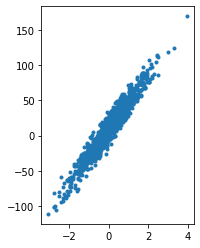

In [117]:
rgdata = datasets.make_regression(
    n_samples=1000, n_features=1, n_informative=1, 
    n_targets=1, bias=10.0, effective_rank=None, 
    tail_strength=0.5, noise=10.0, shuffle=True, 
    coef=True, random_state=1)
fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
ax1.plot(rgdata[0][:,0], rgdata[1], '.')
fig.show()

In [118]:
X = rgdata[0]
Y = rgdata[1]
X.shape, Y.shape

((1000, 1), (1000,))

In [120]:
Xnew = np.hstack([X, np.zeros([X.shape[0], 1])])
Xnew[1,1] = 1
Xnew.shape

(1000, 2)

In [124]:
variance_selection = feature_selection.VarianceThreshold(threshold=0.01)
variance_selection.fit_transform(Xnew).shape

(1000, 1)

In [125]:
variance_selection.variances_

array([0.96236911, 0.000999  ])

# Learning algorithm

In [ ]:
# Application levels

# Regression

# Classification

# Dimension reduction

# Clustering

# Outlier detection

In [126]:
# create 2 array : X & y , and these will be out train x and train y later

X, Y = datasets.make_regression(
    n_samples=1000,   # The number of samples.
    n_features=1,     # The number of features.
    noise = 3.0)      # The standard deviation of the gaussian noise applied to the output.

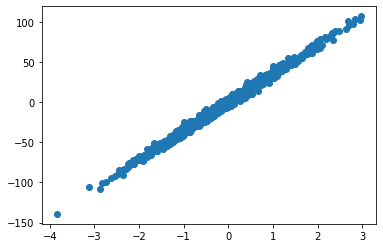

In [128]:
plt.plot(X, Y, 'o')

In [129]:
print(X.shape, Y.shape)

(1000, 1) (1000,)


In [130]:
from sklearn import linear_model

In [137]:
lr = linear_model.LinearRegression()

In [138]:
lr.coef_

AttributeError: 'LinearRegression' object has no attribute 'coef_'

In [139]:
%%time
# Training
lr.fit(X, Y)

CPU times: user 684 µs, sys: 152 µs, total: 836 µs
Wall time: 702 µs


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [142]:
# y = Wx + b. W is coef; b: intercept
lr.coef_

array([35.54261572])

In [143]:
lr.intercept_

-0.18064959190092902

In [144]:
Ypred = lr.predict(X)

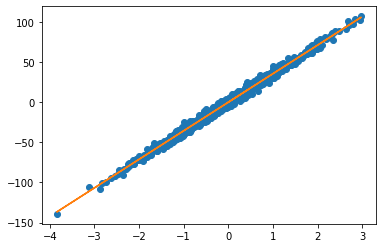

In [145]:
plt.plot(X, Y, 'o')
plt.plot(X, Ypred, '-')
plt.show()

# Model evaluation

In [146]:
from sklearn import metrics

## Regression metrics: 
https://en.wikipedia.org/wiki/Coefficient_of_determination

True: $y_i$

Predict: $f_i$

Residual: $e_i = y_i − f_i$

Mean: ${\displaystyle {\bar {y}}={\frac {1}{n}}\sum _{i=1}^{n}y_{i}}$

The total sum of squares (proportional to the variance of the data):

${\displaystyle SS_{\text{tot}}=\sum _{i}(y_{i}-{\bar {y}})^{2}}$


The regression sum of squares, also called the explained sum of squares:

${\displaystyle SS_{\text{reg}}=\sum _{i}(f_{i}-{\bar {y}})^{2},}$

The sum of squares of residuals, also called the residual sum of squares:

${\displaystyle SS_{\text{res}}=\sum _{i}(y_{i}-f_{i})^{2}=\sum _{i}e_{i}^{2}\,}$

The most general definition of the coefficient of determination is

${\displaystyle R^{2}\equiv 1-{SS_{\rm {res}} \over SS_{\rm {tot}}}\,}$

In [147]:
from sklearn import metrics

In [148]:
metrics.r2_score(y_true=Y, y_pred=Ypred)

0.9931934825733799

In [149]:
metrics.mean_squared_error(y_true=Y, y_pred=Ypred)

8.905928535689785

## Classification metrics

Confusion matrix:

|                   |Actual Positive | Actual Positive |
|-------------------|----------------|-----------------|
|Predicted Positive |     TP         |      FP         |
|Predicted Negative |     FN         |      TN         |


Accuracy: $(TP+TN)\over(TP+FP+FN+TN)$

Precision: $(TP) \over (TP+FP)$

Recall: $(TP) \over (TP+FN)$

F1:  $2 \cdot {precision} \cdot {recall} \over (precision + recall)$

# Model selection

In [150]:
from sklearn import model_selection

In [ ]:
# model_selection.cross_val_predict
# model_selection.cross_val_score

In [151]:
data = datasets.load_breast_cancer()

In [152]:
X, Y = data.data, data.target
print(X.shape, Y.shape)

(569, 30) (569,)


In [153]:
collections.Counter(Y)

Counter({0: 212, 1: 357})

In [156]:
clf = linear_model.LogisticRegression(max_iter=5000)

In [157]:
%%time
clf.fit(X, Y)

CPU times: user 1.14 s, sys: 102 ms, total: 1.24 s
Wall time: 831 ms


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=5000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [158]:
Ypred = clf.predict(X)

In [160]:
metrics.precision_score(Y, Ypred)

0.9586776859504132

### Cross-validation

In [162]:
kf = model_selection.KFold(n_splits=5)

In [163]:
clf = linear_model.LogisticRegression(max_iter=5000)

In [165]:
model_selection.cross_val_score(clf, X, Y, scoring='precision', cv=kf)

array([0.82142857, 0.94117647, 0.97297297, 0.98795181, 0.98795181])

# Production pipeline

In [168]:
from sklearn import pipeline

In [169]:
categories = [
    'alt.atheism',
    'talk.religion.misc'
]

dataset = datasets.fetch_20newsgroups(subset='all', categories=categories,
                                      shuffle=True, random_state=42)

In [170]:
documents = dataset.data
print(len(documents))

1427


In [172]:
print(documents[0])

From: agr00@ccc.amdahl.com (Anthony G Rose)
Subject: Re: Who's next?  Mormons and Jews?
Reply-To: agr00@JUTS.ccc.amdahl.com (Anthony G Rose)
Organization: Amdahl Corporation, Sunnyvale CA
Lines: 18

In article <1993Apr20.142356.456@ra.royalroads.ca> mlee@post.RoyalRoads.ca (Malcolm Lee) writes:
>
>In article <C5rLps.Fr5@world.std.com>, jhallen@world.std.com (Joseph H Allen) writes:
>|> In article <1qvk8sINN9vo@clem.handheld.com> jmd@cube.handheld.com (Jim De Arras) writes:
>|> 
>|> It was interesting to watch the 700 club today.  Pat Robertson said that the
>|> "Branch Dividians had met the firey end for worshipping their false god." He
>|> also said that this was a terrible tragedy and that the FBI really blew it.
>
>I don't necessarily agree with Pat Robertson.  Every one will be placed before
>the judgement seat eventually and judged on what we have done or failed to do
>on this earth.  God allows people to choose who and what they want to worship.

I'm sorry, but He does not!  Ever

In [173]:
y = dataset.target
print(len(y))

1427


In [174]:
collections.Counter(y)

Counter({1: 628, 0: 799})

In [175]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer

In [176]:
vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
normalizer = Normalizer()
clf = linear_model.LogisticRegression(max_iter=5000)
ml_pipeline = make_pipeline(vectorizer, normalizer, clf)

In [177]:
%%time
ml_pipeline.fit(documents, y)

CPU times: user 592 ms, sys: 21.2 ms, total: 613 ms
Wall time: 719 ms


Pipeline(memory=None,
         steps=[('tfidfvectorizer',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=1000,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words='english', strip_accents=None,
                                 sublinear_tf=False,...
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('normalizer', Normalizer(copy=True, norm='l2')),
                ('logisticregression',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_in

In [178]:
ypred = ml_pipeline.predict(documents)

In [179]:
metrics.confusion_matrix(y, ypred)

array([[766,  33],
       [ 50, 578]])

In [180]:
metrics.precision_score(y, ypred)

0.9459901800327333

In [181]:
metrics.recall_score(y, ypred)

0.9203821656050956

In [182]:
metrics.accuracy_score(y, ypred)

0.9418360196215837

In [183]:
metrics.f1_score(y, ypred)

0.9330104923325264

In [184]:
# Cross-validation
model_selection.cross_val_score(ml_pipeline, documents, y, scoring='f1', cv=3)

array([0.87317073, 0.85781991, 0.87088608])

In [191]:
new_documents = [documents[34], documents[48]]

In [193]:
ml_pipeline.predict(new_documents)

array([0, 1])

In [195]:
print(y[34], y[48])

0 1
